In [1]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def charclass(png):     # extract character class name from file name
        return png.split('__')[1][:-4]

pngs = sorted( glob('pngs/*.png') )
h,w,_ = np.array(Image.open(pngs[0])).shape

In [3]:
selection = ['8','9','minus']
pngs = [png for png in pngs if charclass(png) in selection]
WT = np.empty( (len(selection), h*w ) )


a = np.array(Image.open(pngs[0]))[:,:,0].reshape(h*w)
a.shape

(12500,)

In [4]:
def get_avg(cc):
    spngs = [png for png in pngs if charclass(png)==cc]
    h,w,_ = np.array(Image.open(spngs[0])).shape
    avg = np.zeros((h,w))
    for png in spngs:
        a = np.array(Image.open(png))[:,:,0]
        avg += a
    avg /= len(spngs)
    return avg

In [5]:
a.min(), a.max()

(0, 255)

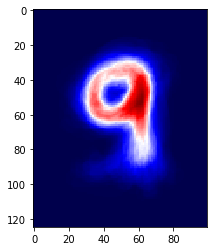

In [6]:
plt.imshow( -get_avg('9'), cmap ='seismic');

In [7]:
pngs = [png for png in pngs if charclass(png) in selection]
WT = np.empty( (len(selection), h*w ) )
selection = ['8','9','minus']
for j, cc in enumerate(selection):  
    WT[j] = get_avg(cc).reshape(h*w)
    WT[j] /= np.linalg.norm(WT[j])

In [8]:
pngs[0]

'pngs/001_20191024_ringland__8.png'

In [9]:
#get the class scores for a single image
x = np.array(Image.open(pngs[0]))[:,:,0].reshape(h*w)
np.argmax( np.dot(WT, x) )
np.dot(WT,x)

array([25027.07940801, 24824.70893203, 24249.83782493])

In [10]:
#make a big array of all the images: each column is a flattened image
X = np.empty( (h*w, len(pngs)) )
X.shape

(12500, 448)

In [14]:
selection.index('minus')

2

In [12]:
selection

['8', '9', 'minus']